In [5]:
from sst_bst import BSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
bst=BSTs('bst')
tstart=datetime.fromisoformat("2022-11-19 00:00:00") 
tend  =datetime.fromisoformat("2022-11-20 00:00:00")
D=bst.getData_avg(tstart,tend,60*10)
print(D.shape)

Load BST bst/BST_2022-11-18-23-20-51.h5
Load BST bst/BST_2022-11-19-00-20-51.h5
Load BST bst/BST_2022-11-19-01-20-51.h5
Load BST bst/BST_2022-11-19-02-20-51.h5
Load BST bst/BST_2022-11-19-03-20-51.h5
Load BST bst/BST_2022-11-19-04-20-51.h5
Load BST bst/BST_2022-11-19-05-20-51.h5
Load BST bst/BST_2022-11-19-06-20-51.h5
Load BST bst/BST_2022-11-19-07-20-51.h5
Load BST bst/BST_2022-11-19-08-20-51.h5
Load BST bst/BST_2022-11-19-09-20-51.h5
Load BST bst/BST_2022-11-19-10-20-51.h5
Load BST bst/BST_2022-11-19-11-20-51.h5
Load BST bst/BST_2022-11-19-12-20-51.h5
Load BST bst/BST_2022-11-19-13-20-51.h5
Load BST bst/BST_2022-11-19-14-20-51.h5
Load BST bst/BST_2022-11-19-15-20-51.h5
Load BST bst/BST_2022-11-19-16-20-51.h5
Load BST bst/BST_2022-11-19-17-20-51.h5
Load BST bst/BST_2022-11-19-18-20-51.h5
Load BST bst/BST_2022-11-19-19-20-51.h5
Load BST bst/BST_2022-11-19-20-20-51.h5
Load BST bst/BST_2022-11-19-21-20-51.h5
Load BST bst/BST_2022-11-19-22-20-51.h5
Load BST bst/BST_2022-11-19-23-20-51.h5


In [7]:
uv_step=0.08
X=np.arange(-1,1,uv_step)
N=len(X)
#print(N,X)
I=np.ones([len(X)])
Y=np.outer(I,X)
X=np.outer(X,I)
R=np.sqrt(X*X+Y*Y)
mask=R<1
theta=np.arccos(R*mask)/np.pi*180
phi=np.angle(X+1j*Y)/np.pi*180
print("Number of beams:",np.sum(mask))
if False:
    plt.subplot(2,2,1)
    plt.imshow(R/mask);plt.colorbar();plt.title('R');
    plt.subplot(2,2,2)
    plt.imshow(theta/mask);plt.colorbar();plt.title('theta');
    plt.subplot(2,2,3)
    plt.imshow(phi/mask,cmap='twilight');plt.colorbar();plt.title('phi');


Number of beams: 484


In [8]:
index=np.array(range(N*N))
indexC=np.compress(mask.flatten(),index)
NC=len(indexC)
thetaC=np.compress(mask.flatten(),theta.flatten())
phiC=np.compress(mask.flatten(),phi.flatten())
def makeMat(N,indexC,varC,zeros=None):
    D=np.zeros([N*N])
    D[:]=zeros
    D[indexC]=varC
    D=D.reshape([N,N])
    return D
#plt.imshow(makeMat(N,indexC,phiC))

In [9]:
def P2dB(X): 
    return 10*np.log10(X+1e-3)


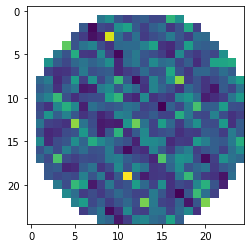

In [10]:
bstX=D[0,0][:2*NC:2]/D[0,0][2*NC]
bstY=D[0,0][1:1+2*NC:2]/D[0,0][2*NC+1]
plt.imshow(makeMat(N,indexC,P2dB(bstX)))

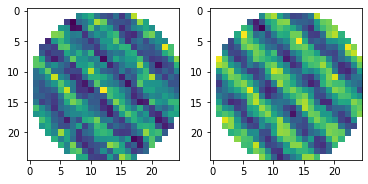

In [12]:
from time import sleep
from IPython.display import clear_output
for x in range(20):
    clear_output(wait=True)
    bstX=D[x,0][:2*NC:2]#/D[x,0][2*NC]
    bstY=D[x,0][1:1+2*NC:2]#/D[x,0][2*NC+1]    
    fig1=plt.subplot(1,2,1)
    plt1=plt.imshow(makeMat(N,indexC,P2dB(bstX)))
    plt.subplot(1,2,2)
    plt2=plt.imshow(makeMat(N,indexC,P2dB(bstY)))
#    plt.colorbar()
    plt.show();
    sleep(0.5)